# Problem Statement

Using the transaction dataset, identify the annual salary for each customer

Exploring correlations between annual salary and various customer attributes (e.g. age). Visualising interesting correlations using a scatter plot.

To Build a simple regression model to predict the annual salary for each customer using the attributes identified above, building a decision-tree based model to predict salary, testing its performance.

# Work Flow

1. Loading the data
2. Feature Engineering
3. Data Splitting
4. Data Modeling
5. Data Evaluation

# Loading the data

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data directory
import os
import pickle

PICKLE_DATA_DIR = os.path.join("..", "cleaned_data", "procesed_data.pkl")
data = pd.read_pickle(PICKLE_DATA_DIR)
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,Wednesday,August
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,Wednesday,August
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,Wednesday,August
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,Wednesday,August
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,Wednesday,August


In [3]:
data.shape

(12043, 21)

# Feature Engineering

**Missing Values**

In [4]:
# checking for missing values in the data
data.isnull().sum()

status               0
card_present_flag    0
account              0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
customer_id          0
merchant_long_lat    0
movement             0
weekday              0
month_name           0
dtype: int64

In [5]:
data.describe()

,card_present_flag,balance,age,amount
count,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.873536,14704.195553,30.582330,187.933588
std,0.332385,31503.722652,10.046343,592.599934
min,0.000000,0.240000,18.000000,0.100000
25%,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,12465.945000,38.000000,53.655000
max,1.000000,267128.520000,78.000000,8835.980000


**Categorical Variables**

In [6]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['status',
 'account',
 'long_lat',
 'txn_description',
 'merchant_id',
 'first_name',
 'gender',
 'merchant_suburb',
 'merchant_state',
 'extraction',
 'transaction_id',
 'customer_id',
 'merchant_long_lat',
 'movement',
 'weekday',
 'month_name']

In [7]:
for feature in categorical_features:
    print(feature,':',len(data[feature].unique()))

status : 2
account : 100
long_lat : 100
txn_description : 6
merchant_id : 5726
first_name : 80
gender : 2
merchant_suburb : 1610
merchant_state : 9
extraction : 9442
transaction_id : 12043
customer_id : 100
merchant_long_lat : 2704
movement : 2
weekday : 7
month_name : 3


In [8]:
data.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement',
       'weekday', 'month_name'],
      dtype='object')

Since, we need to build a model to predict the annual salary for each customer. Lets look at the types of transactions.

In [9]:
data.txn_description.unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [10]:
# for predicting the annual salary we will concentrate on pay/salary of the transactions feature

salaries = data[data['txn_description'] == 'PAY/SALARY'].groupby('customer_id').mean()

In [11]:
salaries.columns

Index(['card_present_flag', 'balance', 'age', 'amount'], dtype='object')

In [12]:
salaries.head()

,card_present_flag,balance,age,amount
customer_id,,,,
CUS-1005756958,1.0,4718.665385,53.0,970.47
CUS-1117979751,1.0,11957.202857,21.0,3578.65
CUS-1140341822,1.0,5841.720000,28.0,1916.51
CUS-1147642491,1.0,8813.467692,34.0,1711.39
CUS-1196156254,1.0,23845.717143,34.0,3903.73


In [13]:
df =[]
for id in data['customer_id']:
    df.append(int(salaries.loc[id]['amount'].mean()))
data['annual_salary'] = df

In [14]:
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name,annual_salary
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,Wednesday,August,1013
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,Wednesday,August,1013
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,Wednesday,August,1002
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,Wednesday,August,892
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,Wednesday,August,1013


In [15]:
data.shape

(12043, 22)

In [16]:
pred_sal = data[data['txn_description'] == 'PAY/SALARY']
pred_sal.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,weekday,month_name,annual_salary
50,posted,1.0,ACC-588564840,151.27 -33.76,PAY/SALARY,Missing,Isaiah,8342.11,2018-08-01,M,...,Missing,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,Missing,credit,Wednesday,August,3903
61,posted,1.0,ACC-1650504218,145.01 -37.93,PAY/SALARY,Missing,Marissa,2040.58,2018-08-01,F,...,Missing,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281,Missing,credit,Wednesday,August,1626
64,posted,1.0,ACC-3326339947,151.18 -33.80,PAY/SALARY,Missing,Eric,3158.51,2018-08-01,M,...,Missing,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476,Missing,credit,Wednesday,August,983
68,posted,1.0,ACC-3541460373,145.00 -37.83,PAY/SALARY,Missing,Jeffrey,2517.66,2018-08-01,M,...,Missing,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684,Missing,credit,Wednesday,August,1408
70,posted,1.0,ACC-2776252858,144.95 -37.76,PAY/SALARY,Missing,Kristin,2271.79,2018-08-01,F,...,Missing,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273,Missing,credit,Wednesday,August,1068


In [17]:
pred_sal.shape

(883, 22)

In [18]:
pred_sal = pred_sal.filter(['status','gender','merchant_state','movement','balance','age','amount','weekday','month_name','annual_salary'])
pred_sal.head()

,status,gender,merchant_state,movement,balance,age,amount,weekday,month_name,annual_salary
50,posted,M,Missing,credit,8342.11,23,3903.95,Wednesday,August,3903
61,posted,F,Missing,credit,2040.58,23,1626.48,Wednesday,August,1626
64,posted,M,Missing,credit,3158.51,22,983.36,Wednesday,August,983
68,posted,M,Missing,credit,2517.66,24,1408.08,Wednesday,August,1408
70,posted,F,Missing,credit,2271.79,43,1068.04,Wednesday,August,1068


In [19]:
# encoding the features
from sklearn.preprocessing import LabelEncoder

# label encoding
encoder = LabelEncoder()

pred_sal.status = encoder.fit_transform(pred_sal.status)
pred_sal.gender = encoder.fit_transform(pred_sal.gender)
pred_sal.merchant_state = encoder.fit_transform(pred_sal.merchant_state)
pred_sal.movement = encoder.fit_transform(pred_sal.movement)
pred_sal.weekday = encoder.fit_transform(pred_sal.weekday)
pred_sal.month_name = encoder.fit_transform(pred_sal.month_name)

In [20]:
pred_sal.head()

,status,gender,merchant_state,movement,balance,age,amount,weekday,month_name,annual_salary
50,0,1,0,0,8342.11,23,3903.95,4,0,3903
61,0,0,0,0,2040.58,23,1626.48,4,0,1626
64,0,1,0,0,3158.51,22,983.36,4,0,983
68,0,1,0,0,2517.66,24,1408.08,4,0,1408
70,0,0,0,0,2271.79,43,1068.04,4,0,1068


In [21]:
x = pred_sal.drop('annual_salary',axis = 1)
y = pred_sal['annual_salary']

In [22]:
x.head()

,status,gender,merchant_state,movement,balance,age,amount,weekday,month_name
50,0,1,0,0,8342.11,23,3903.95,4,0
61,0,0,0,0,2040.58,23,1626.48,4,0
64,0,1,0,0,3158.51,22,983.36,4,0
68,0,1,0,0,2517.66,24,1408.08,4,0
70,0,0,0,0,2271.79,43,1068.04,4,0


In [23]:
y.head()

50    3903
61    1626
64     983
68    1408
70    1068
Name: annual_salary, dtype: int64

**Feature importance**

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier().fit(x,y)
model.feature_importances_

array([0.        , 0.04968297, 0.        , 0.        , 0.11444711,
       0.36015328, 0.32446306, 0.14495901, 0.00629457])

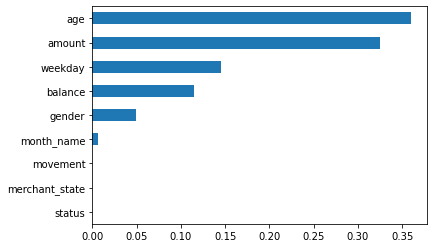

In [25]:
ranked_features = pd.Series(model.feature_importances_, index=x.columns)
ranked_features.sort_values().plot(kind='barh')
plt.show()

In [26]:
# removing the features which are not important 
x = x[['age','amount','weekday','gender','balance','month_name']]

In [27]:
x.head()

,age,amount,weekday,gender,balance,month_name
50,23,3903.95,4,1,8342.11,0
61,23,1626.48,4,0,2040.58,0
64,22,983.36,4,1,3158.51,0
68,24,1408.08,4,1,2517.66,0
70,43,1068.04,4,0,2271.79,0


**Correlation**

In [28]:
x.corr()

,age,amount,weekday,gender,balance,month_name
age,1.000000,-0.138594,-0.063549,0.031567,0.194956,-0.000640
amount,-0.138594,1.000000,-0.154869,0.181306,0.287501,0.007543
weekday,-0.063549,-0.154869,1.000000,-0.037365,-0.161711,0.004787
gender,0.031567,0.181306,-0.037365,1.000000,0.138691,0.001871
balance,0.194956,0.287501,-0.161711,0.138691,1.000000,0.051479
month_name,-0.000640,0.007543,0.004787,0.001871,0.051479,1.000000


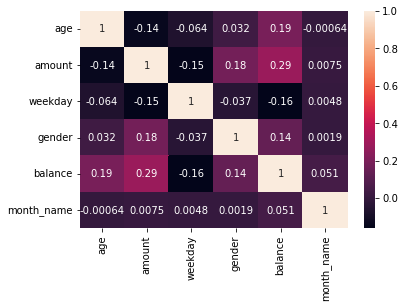

<Figure size 1440x1440 with 0 Axes>

In [29]:
sns.heatmap(x.corr(), annot=True)
plt.figure(figsize=(20,20))
plt.show()

As no multicollinearity exists, we will proceed further

# Data Splitting

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [31]:
print(x.shape, x_train.shape, x_test.shape)

(883, 6) (618, 6) (265, 6)


# Linear Regression

**Model Building**

In [32]:
# loading the Linear Regression Model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(x_train,y_train)

In [33]:
# Prediction on training data
train_data_pred = linear_model.predict(x_train)

In [34]:
# R squared Value for trainig data
from sklearn import metrics

R_sq_train = metrics.r2_score(y_train, train_data_pred)
print(R_sq_train)

0.9999999415185085


**Model Evaluation**

In [35]:
# Prediction on test data
test_data_pred = linear_model.predict(x_test)

In [36]:
# R squared Value for test data
R_sq_test = metrics.r2_score(y_test, test_data_pred)
print(R_sq_test)

0.9999999538779182


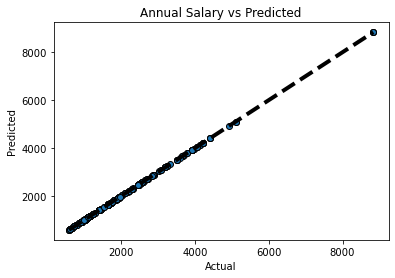

In [37]:
# Plot of predicted salary against actual salary
fig, ax = plt.subplots()
ax.scatter(y_test, test_data_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [38]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": test_data_pred})
results.head(10)

,Actual,Predicted
11379,2572,2572.282363
10430,8835,8835.377651
4840,2470,2470.042780
11064,3712,3712.092730
7203,970,970.191013
10854,4054,4054.168898
7071,664,664.022138
1730,761,760.815946
2036,2544,2544.218027
7469,1808,1808.110759


In [39]:
print("Coefficient of determination : ", metrics.r2_score(y_test, test_data_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, test_data_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, test_data_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, test_data_pred))

Coefficient of determination :  0.9999999538779182
Mean Squared Error :  0.07658552706948063
Root Mean Squared Error :  0.2767409024150218
Mean Absolute Error :  0.23420001077396643


**Interpretation**

- From the R-squared value, we observe that our Linear Regressionmodel is accurate to 99%.
- As the mean square error, Root mean sqaure error values are close to 0, which indicates that the Linear Regression model is peforming good in predicting the anual salary.
- The Mean absolute error value is close to zero depecting that our Linear Regression model is very good in predicting. 

# Decision Tree Regressor

**Model Building**

In [40]:
# Loading decision tree Model
from sklearn.tree import DecisionTreeRegressor

# loading the Model
tree_model = DecisionTreeRegressor().fit(x_train,y_train)

In [41]:
# Prediction on training data
tree_train_pred = tree_model.predict(x_train)

In [42]:
# R squared Value for trainig data

tree_R2_train = metrics.r2_score(y_train, tree_train_pred)
print(tree_R2_train)

1.0


**Model Evaluation**

In [43]:
# Prediction on test data
tree_test_pred = tree_model.predict(x_test)

In [44]:
# R squared Value for test data

tree_R2_test = metrics.r2_score(y_test, tree_test_pred)
print(tree_R2_test)

1.0


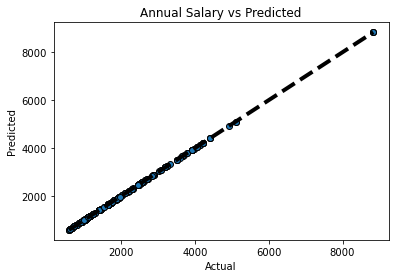

In [45]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, tree_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [46]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": tree_test_pred})
results.head(10)

,Actual,Predicted
11379,2572,2572.0
10430,8835,8835.0
4840,2470,2470.0
11064,3712,3712.0
7203,970,970.0
10854,4054,4054.0
7071,664,664.0
1730,761,761.0
2036,2544,2544.0
7469,1808,1808.0


In [47]:
print("Coefficient of determination : ", metrics.r2_score(y_test, tree_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, tree_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, tree_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, tree_test_pred))

Coefficient of determination :  1.0
Mean Squared Error :  0.0
Root Mean Squared Error :  0.0
Mean Absolute Error :  0.0


**Interpretation**
- From the R-squared value, we observe that our Decision Tree Regressor model absolutely accurate to 100%.
- As the mean square error, Root mean sqaure error & mean absolute error values are 0, which indicates that the Decision Tree Regressor model is very accurate in predicting the anual salary.

# Support Vector Machine Regressor

**Model Building**

In [48]:
# Loading Support Vector Machine Model
from sklearn import svm

SVM_model = svm.SVR(kernel='linear').fit(x_train,y_train)

In [49]:
# Prediction on training data
SVM_train_data_pred = SVM_model.predict(x_train)

In [50]:
# R squared Value for trainig data
SVM_R_sq_train = metrics.r2_score(y_train, SVM_train_data_pred)
print(SVM_R_sq_train)

0.9339923257629389


**Model Evaluation**

In [51]:
# Prediction on test data
SVM_test_data_pred = SVM_model.predict(x_test)

In [52]:
# R squared Value for test data
SVM_R_sq_test = metrics.r2_score(y_test, SVM_test_data_pred)
print(SVM_R_sq_test)

0.9480977842300329


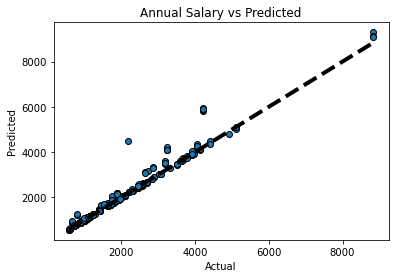

In [53]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, SVM_test_data_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [54]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": SVM_test_data_pred})
results.head(10)

,Actual,Predicted
11379,2572,2592.393707
10430,8835,9297.166258
4840,2470,2550.699932
11064,3712,3677.266990
7203,970,971.084662
10854,4054,4342.441426
7071,664,916.640926
1730,761,761.120976
2036,2544,2520.070944
7469,1808,1777.766629


In [55]:
print("Coefficient of determination : ", metrics.r2_score(y_test, SVM_test_data_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, SVM_test_data_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, SVM_test_data_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, SVM_test_data_pred))

Coefficient of determination :  0.9480977842300329
Mean Squared Error :  86183.4157526652
Root Mean Squared Error :  293.57012067420146
Mean Absolute Error :  108.76032839534571


**Interpretation**
- From the R-squared value, we observe that our SVM Regressor model is accurate to 94%.
- As the mean square error, Root mean sqaure error  & Mean absolute error values are not close to 0, which indicates that the SVM Regressor model is not good in predicting the anual salary.

# KNN Regressor

**Model Building**

In [56]:
# Loading KNN Model
from sklearn.neighbors import KNeighborsRegressor

# loading the Model
KNN_model = KNeighborsRegressor(n_neighbors=5).fit(x_train,y_train)

# R squared Value for trainig data
KNN_train_pred = KNN_model.predict(x_train)
KNN_R2_train = metrics.r2_score(y_train, KNN_train_pred)
print(KNN_R2_train)

0.9034399488620949


In [57]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = [{'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15]}]
search = GridSearchCV(KNN_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.2s finished


In [58]:
# optimum parameter values
search.best_params_

{'n_neighbors': 3}

In [59]:
KNN_model = KNeighborsRegressor(n_neighbors=3).fit(x_train,y_train)

In [60]:
# R squared Value for trainig data

KNN_train_pred = KNN_model.predict(x_train)
KNN_R2_train = metrics.r2_score(y_train, KNN_train_pred)
print(KNN_R2_train)

0.9264738013254797


**Model Evaluation**

In [61]:
# Prediction on test data
KNN_test_pred = KNN_model.predict(x_test)

In [62]:
# R squared Value for test data

KNN_R2_test = metrics.r2_score(y_test, KNN_test_pred)
print(KNN_R2_test)

0.7496042364910661


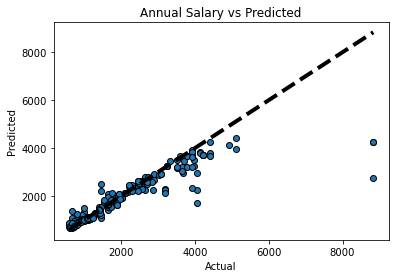

In [63]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, KNN_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [64]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": KNN_test_pred})
results.head(10)

,Actual,Predicted
11379,2572,2553.00
10430,8835,4247.25
4840,2470,2232.50
11064,3712,3441.50
7203,970,952.25
10854,4054,2944.00
7071,664,1081.00
1730,761,978.00
2036,2544,2436.50
7469,1808,1874.25


In [65]:
print("Coefficient of determination : ", metrics.r2_score(y_test, KNN_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, KNN_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, KNN_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, KNN_test_pred))

Coefficient of determination :  0.7496042364910661
Mean Squared Error :  415781.1351415094
Root Mean Squared Error :  644.8109297627557
Mean Absolute Error :  237.98207547169812


**Interpretation**
- From the R-squared value, we observe that our KNN Regressor model is accurate to 75%.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the KNN Regressor model is not good in predicting the anual salary.

# Random Forest Regressor

**Model Building**

In [82]:
# Loading random forest Model
from sklearn.ensemble import RandomForestRegressor

# loading the Model
rf_model = RandomForestRegressor(n_estimators=500, max_features='sqrt').fit(x_train,y_train)

# R squared Value for trainig data
rf_train_pred = rf_model.predict(x_train)
rf_R2_train = metrics.r2_score(y_train, rf_train_pred)
print(rf_R2_train)

0.9932869082765658


In [83]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = [{'n_estimators':[100,200,300,400,500,600]}]
search = GridSearchCV(rf_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   12.2s finished


In [84]:
# optimum parameter values
search.best_params_

{'n_estimators': 500}

In [85]:
rf_model = RandomForestRegressor(n_estimators=500, max_features='sqrt').fit(x_train,y_train)

In [86]:
# R squared Value for trainig data

rf_train_pred = rf_model.predict(x_train)
rf_R2_train = metrics.r2_score(y_train, rf_train_pred)
print(rf_R2_train)

0.9943795581674075


**Model Evaluation**

In [87]:
# Prediction on test data
rf_test_pred = rf_model.predict(x_test)

In [88]:
# R squared Value for test data

rf_R2_test = metrics.r2_score(y_test, rf_test_pred)
print(rf_R2_test)

0.9404229634479092


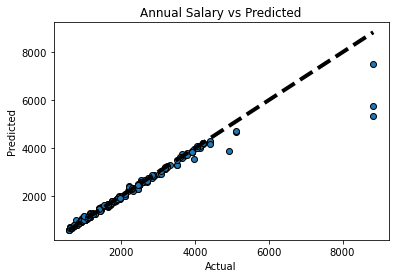

In [89]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, rf_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [90]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": rf_test_pred})
results.head(10)

,Actual,Predicted
11379,2572,2584.493333
10430,8835,7500.210000
4840,2470,2452.786667
11064,3712,3680.366667
7203,970,987.800000
10854,4054,3990.906667
7071,664,695.293333
1730,761,812.040000
2036,2544,2517.040000
7469,1808,1769.026667


In [91]:
print("Coefficient of determination : ", metrics.r2_score(y_test, rf_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, rf_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, rf_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, rf_test_pred))

Coefficient of determination :  0.9404229634479092
Mean Squared Error :  98927.42408603773
Root Mean Squared Error :  314.52730260827553
Mean Absolute Error :  77.59519496855346


**Interpretation**
- From the R-squared value, we observe that our Random Forest model is accurate to 94%.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the Random Forest model is not good in predicting the anual salary.

# Bagging

**Model Building**

In [92]:
# loading the Model
bag_model = RandomForestRegressor(n_estimators=500, max_features=None).fit(x_train,y_train)

# R squared Value for trainig data
bag_train_pred = bag_model.predict(x_train)
bag_R2_train = metrics.r2_score(y_train, bag_train_pred)
print(bag_R2_train)

0.9981083291522947


In [93]:
# hyperparameter tuning
parameters = [{'n_estimators':[100,200,300,400,500,600]}]
search = GridSearchCV(bag_model, parameters, scoring='neg_mean_squared_error', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   14.8s finished


In [94]:
# optimum parameter values
search.best_params_

{'n_estimators': 300}

In [95]:
bag_model = RandomForestRegressor(n_estimators=300, max_features=None).fit(x_train,y_train)

In [96]:
# R squared Value for trainig data

bag_train_pred = bag_model.predict(x_train)
bag_R2_train = metrics.r2_score(y_train, bag_train_pred)
print(bag_R2_train)

0.9975421565745112


**Model Evaluation**

In [97]:
# Prediction on test data
bag_test_pred = bag_model.predict(x_test)

In [98]:
# R squared Value for test data

bag_R2_test = metrics.r2_score(y_test, bag_test_pred)
print(bag_R2_test)

0.9876925067222695


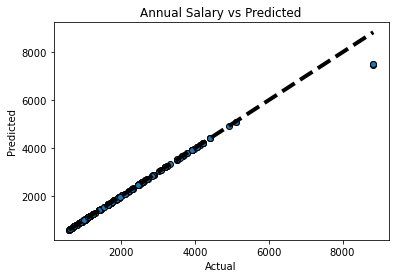

In [99]:
# Plot of predicted salary against actual salary

fig, ax = plt.subplots()
ax.scatter(y_test, bag_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

In [100]:
# Comparing Actual vs Predicted test results
results = pd.DataFrame({"Actual": y_test, "Predicted": bag_test_pred})
results.head(10)

,Actual,Predicted
11379,2572,2572.570
10430,8835,7505.190
4840,2470,2469.565
11064,3712,3696.340
7203,970,970.000
10854,4054,4050.555
7071,664,664.000
1730,761,761.000
2036,2544,2543.970
7469,1808,1814.100


In [101]:
print("Coefficient of determination : ", metrics.r2_score(y_test, bag_test_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, bag_test_pred))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, bag_test_pred)))
print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, bag_test_pred))

Coefficient of determination :  0.9876925067222695
Mean Squared Error :  20436.541952830186
Root Mean Squared Error :  142.95643375808655
Mean Absolute Error :  16.325320754716966


**Interpretation**
- From the R-squared value, we observe that our Bagging model is accurate to 98%.
- As the mean square error, Root mean sqaure error & Mean absolute error values are not close to 0, which indicates that the Bagging model is not good in predicting the anual salary.

# Comparison

Decreasing order of R-square values are depicted as:

- Decision Tree Regressor - 1.0
- Linear Reression - 0.9999
- Bagging - 0.9876
- SVM Regressor - 0.9480
- Random Forest Regressor - 0.9404
- KNN Regressor - 0.7496

The results are highly clear both Linear Regression model ad Decision Tree Regressor models are good in predicting the annual salary. For the remaining models, the R-squared score is good but the MSE, RMSE & MAE vcalues are not getting close to 0, which implies these models are not good at predicting the annual salary.

# Building a predective system

In [102]:
# input data -> (age: 22, amount: 983.36, weekday: 4, gender: 1, balance: 3158.51, month_name: 0)

input_data = (22, 983.36, 4, 1, 3158.51, 0)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [103]:
prediction = tree_model.predict(input_data_reshape)
print(prediction)

[983.]


In [104]:
# input data -> (age: 40, amount: 1048.52, weekday: 2, gender: 0, balance: 1747.91, month_name: 2)

input_data = (40, 1048.52, 2, 0, 1747.91, 2)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [105]:
prediction = rf_model.predict(input_data_reshape)
print(prediction)

[998.61333333]
